In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/df_before_business_logic.csv')
df.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


**There are several observations made in the real estate world:**
- Ensure each BHK has at least 300 sqft. So, the total minimum area for a house should be 300×BHK.
- The number of bathrooms should not exceed BHK + 1.
- Since the primary focus is on 2BHK and 3BHK homes, filter out any other configurations.
- Assuming the price_per_sqft column follows a normal distribution, identify and remove outliers using statistical methods.
- Remove higher BHK homes that are priced lower than similar lower BHK homes in the same location.

In [7]:
df[~((df['total_sqft'] / df['BHK']) < 300)].shape

(12457, 7)

In [9]:
df = df[~((df['total_sqft'] / df['BHK']) < 300)]

In [10]:
df.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


In [19]:
df = df[df['bath'] <= (df['BHK'] + 1)]

In [20]:
df.sample(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9315,Bannerghatta Road,4 Bedroom,2400.0,4.0,344.0,4.0,14333.333333
9931,Thanisandra,3 BHK,2050.0,3.0,150.0,3.0,7317.073171
1334,Panathur,2 BHK,1085.0,2.0,36.0,2.0,3317.972350
1610,Electronics City Phase 1,2 BHK,1160.0,2.0,52.0,2.0,4482.758621
10905,other,2 BHK,1165.0,2.0,65.0,2.0,5579.399142
8506,Haralur Road,3 BHK,1810.0,3.0,100.0,3.0,5524.861878
12867,8th Phase JP Nagar,3 BHK,1408.0,3.0,80.0,3.0,5681.818182
772,Thanisandra,1 RK,445.0,1.0,28.0,1.0,6292.134831
9830,Bannerghatta Road,3 BHK,1460.0,2.0,80.0,3.0,5479.452055
8440,Varthur Road,2 BHK,1033.0,2.0,32.0,2.0,3097.773475


In [22]:
bhk_counts = df['BHK'].value_counts()
bhk_filtered = bhk_counts[bhk_counts > 10]
bhk_values = bhk_filtered.index
bhk_list = bhk_values.tolist()
bhk_list

[2.0, 3.0, 4.0, 1.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [23]:
df = df[df['BHK'].isin(bhk_list)]

In [24]:
df.shape

(12297, 7)

In [26]:
df.sample(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
12432,Doddathoguru,3 BHK,1382.00,3.0,65.00,3.0,4703.328509
5141,Haralur Road,2 BHK,1300.00,2.0,75.00,2.0,5769.230769
7686,Devanahalli,3 BHK,1498.00,3.0,79.15,3.0,5283.711615
8619,Electronics City Phase 1,3 BHK,1530.00,3.0,40.00,3.0,2614.379085
3032,other,1 Bedroom,461.82,1.0,31.70,1.0,6864.146204
8206,Chikkalasandra,3 BHK,1290.00,2.0,56.12,3.0,4350.387597
8942,Raja Rajeshwari Nagar,2 BHK,1295.00,2.0,43.90,2.0,3389.961390
707,Gubbalala,3 BHK,1470.00,2.0,82.00,3.0,5578.231293
8037,Gubbalala,3 BHK,1435.00,2.0,80.00,3.0,5574.912892
5724,other,4 BHK,2050.00,3.0,100.00,4.0,4878.048780


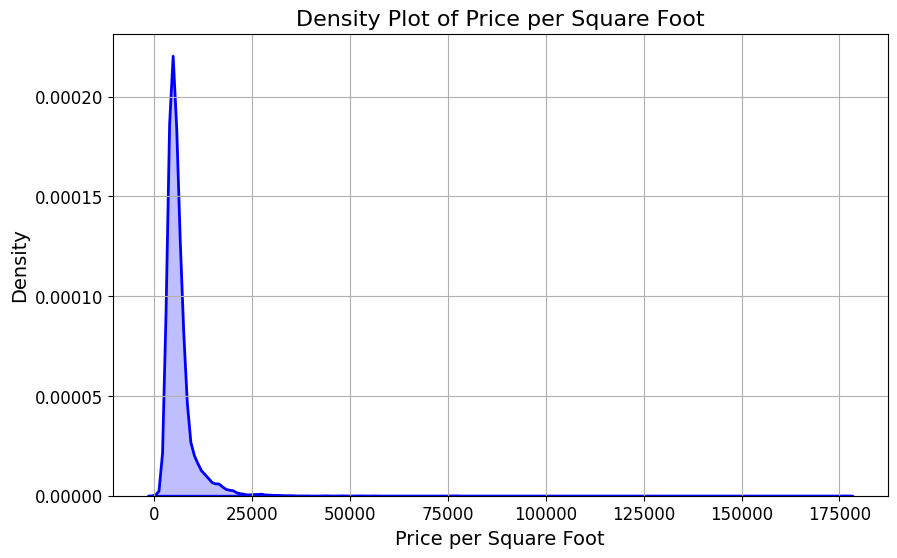

In [27]:
plt.figure(figsize=(10, 6))
kde_plot = sns.kdeplot(data=df, x='price_per_sqft', color='blue', fill=True, linewidth=2)

plt.title('Density Plot of Price per Square Foot', fontsize=16)
plt.xlabel('Price per Square Foot', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)

plt.show()

In [33]:
df['price_per_sqft'].describe()

count     12297.000000
mean       6246.293260
std        4061.729884
min         267.829813
25%        4200.120192
50%        5272.727273
75%        6859.504132
max      176470.588235
Name: price_per_sqft, dtype: float64

<Figure size 1000x600 with 0 Axes>

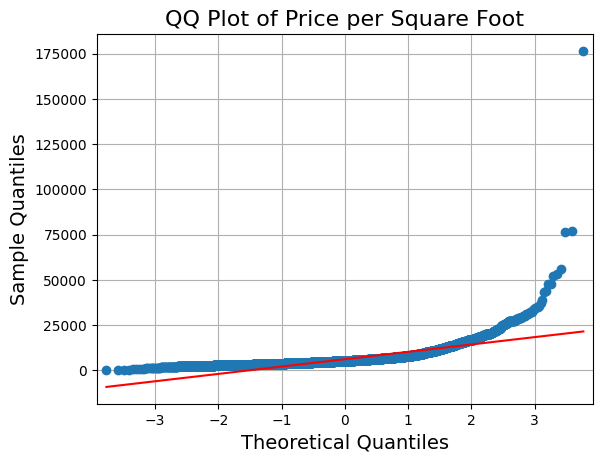

In [34]:
import statsmodels.api as sm
plt.figure(figsize=(10, 6))
qq_plot = sm.qqplot(df['price_per_sqft'], line='s')

plt.title('QQ Plot of Price per Square Foot', fontsize=16)
plt.xlabel('Theoretical Quantiles', fontsize=14)
plt.ylabel('Sample Quantiles', fontsize=14)
plt.grid(True)

plt.show()

**The KDE Plot shows that the data is right-skewed.**

**The QQ Normal Plot shows that the data is normally distributed but is right skewed.**

**There are 2 ways in tackling these outliers :**
- Outliers based on interquartile range.
- Keep data with the range of mean + standard deviation.
- We will use the second method.

In [36]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("Interquartile Range (IQR):", IQR)

Q1 (25th percentile): 4200.120192307692
Q3 (75th percentile): 6859.504132231405
Interquartile Range (IQR): 2659.383939923712


In [37]:
(df['price_per_sqft'] < (Q1 - 1.5 * IQR)).sum()

0

In [38]:
(df['price_per_sqft'] > (Q3 + 1.5 * IQR)).sum()

968

In [40]:
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()
mean,std

(6246.293259550544, 4061.7298838135234)

In [41]:
(df['price_per_sqft'] > (mean + std)).sum()

1114

In [42]:
(df['price_per_sqft'] < (mean - std)).sum()

45

In [46]:
df.shape

(12297, 7)

In [49]:
df_outlier_price_per_sqft = df[(df['price_per_sqft'] > (mean - std)) & (df['price_per_sqft'] <= (mean + std))]

In [50]:
df_outlier_price_per_sqft

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...
13194,Uttarahalli,3 BHK,1345.0,2.0,57.00,3.0,4237.918216
13195,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3.0,6530.612245
13196,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0,6689.834926
13198,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0,5258.545136


In [52]:
df_outlier_price_per_sqft.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000


In [53]:
df = df_outlier_price_per_sqft

In [54]:
df.shape

(11138, 7)

**Now we will write a function to plot 2 and 3 BHK prices of a particular region, and since the number of 2 and 3 BHK dominate others, we will only use 2 and 3 BHK in our function.**

In [56]:
def df_bhk_i(df,bhk):
    df_bhk_i = df[df['BHK'].isin(bhk)]
    return df_bhk_i

In [57]:
df_bhk_i(df,[2,3])

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2.0,3247.863248
...,...,...,...,...,...,...,...
13191,Rachenahalli,2 BHK,1050.0,2.0,52.71,2.0,5020.000000
13193,Bellandur,2 BHK,1262.0,2.0,47.00,2.0,3724.247227
13194,Uttarahalli,3 BHK,1345.0,2.0,57.00,3.0,4237.918216
13195,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3.0,6530.612245


In [58]:
def price_bhk_plot(df,location):
    bhk_2_3 = df_bhk_i(df,[2,3])
    df_location = bhk_2_3[bhk_2_3['location'] == location]
    avg_price_2BHK = df_location[df_location['BHK'] == 2]['price'].mean()
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df_location,x = 'total_sqft',y = 'price',hue = 'BHK',palette='coolwarm', s=100, edgecolor='w', alpha=0.7)
    plt.title(f'Prices of 2BHK and 3BHK Homes in {location}', fontsize=16)
    plt.xlabel('Total Square Feet', fontsize=14)
    plt.ylabel('Price(in lacs)', fontsize=14)
    plt.axhline(avg_price_2BHK,color = 'black',linestyle = '--',label=f'2BHK Avg Price: {avg_price_2BHK:.2f}')
    plt.legend(title='BHK', fontsize=12, title_fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

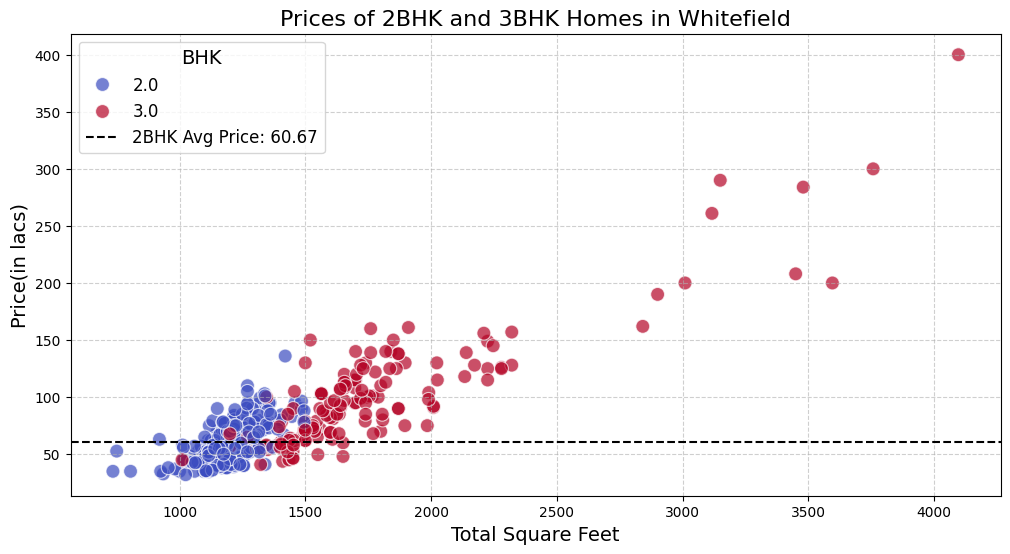

In [59]:
price_bhk_plot(df,'Whitefield')

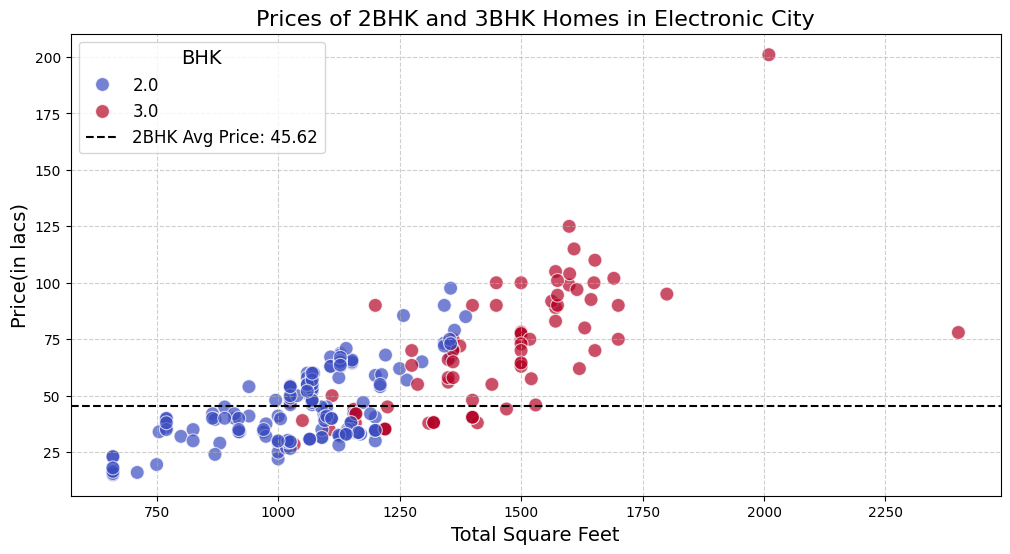

In [60]:
price_bhk_plot(df,'Electronic City')

**This analysis is based on price. Now we will remove outliers based on price per sqft.**

In [63]:
def bhk_outlier(df,location):
    bhk_2_3 = df_bhk_i(df,[2,3])
    df_location = bhk_2_3[bhk_2_3['location'] == location]
    avg_price_2BHK = df_location[df_location['BHK'] == 2]['price'].mean()
    bhk_3 = df_bhk_i(df,[3])
    bhk3_remove = bhk_3[bhk_3['price'] < avg_price_2BHK].index
    df.drop(bhk3_remove,inplace=True)
    return df

In [66]:
df_copy_whitefield = df.copy()

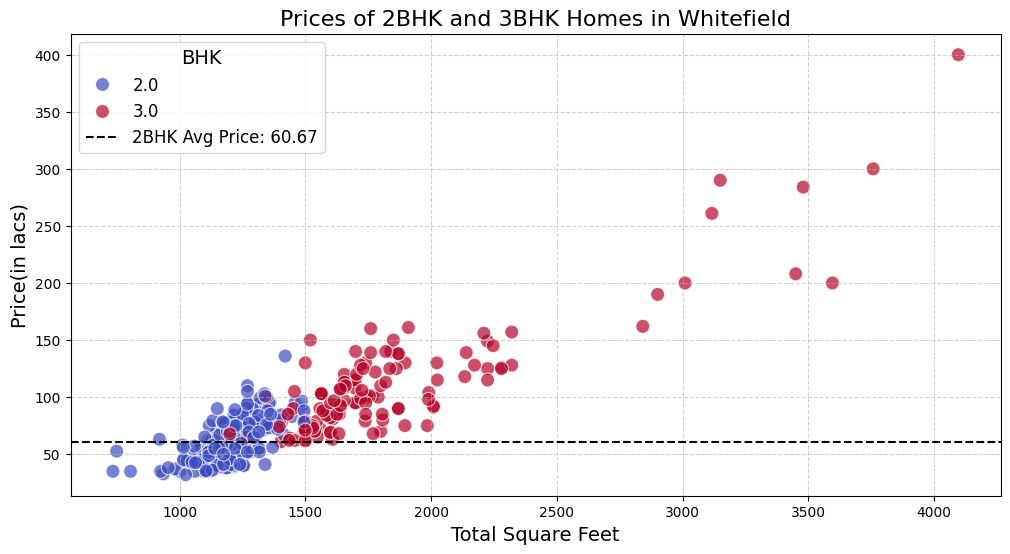

In [67]:
price_bhk_plot(bhk_outlier(df_copy_whitefield,'Whitefield'),'Whitefield')

In [68]:
df_copy_ec = df.copy()

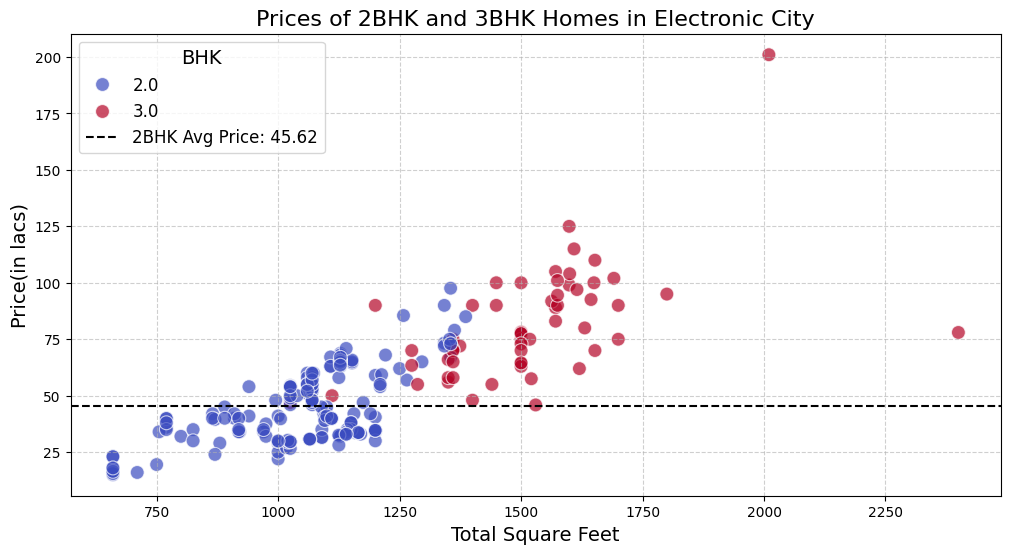

In [69]:
price_bhk_plot(bhk_outlier(df_copy_ec,'Electronic City'),'Electronic City')

In [102]:
df['BHK'].value_counts()

BHK
2.0    5315
3.0    4288
4.0     734
1.0     577
5.0     111
6.0      58
7.0      27
8.0      19
9.0       9
Name: count, dtype: int64

In [103]:
df_copy3 = df.copy()

**Explanation of the code written below:**

*Finding Outliers for Each Location:*
- The code identifies outliers in property prices per square foot for each location. Outliers are properties with prices significantly lower than the location's average price per square foot.

*Calculating Mean, Standard Deviation, and Count for Each Location:*
- The code calculates statistical measures for each location: mean (average price per square foot), standard deviation (variability in prices), and count (total properties).

*Identifying Outliers:*
- Outliers are identified by comparing each property's price per square foot to the location's average. If a property's price per square foot is significantly lower than the location's average, it's flagged as an outlier.

In [123]:
## Function to remove outliers from all locations
def remove_bhk_outliers_for_all(df):
    outlier_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_statistics = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_statistics[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_statistics.get(bhk-1)
            if stats and stats['count'] > 5:
                outlier_indices = np.append(outlier_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(outlier_indices,axis='index')
df_outliers = remove_bhk_outliers_for_all(df_copy3)
df_outliers.shape

(7955, 7)

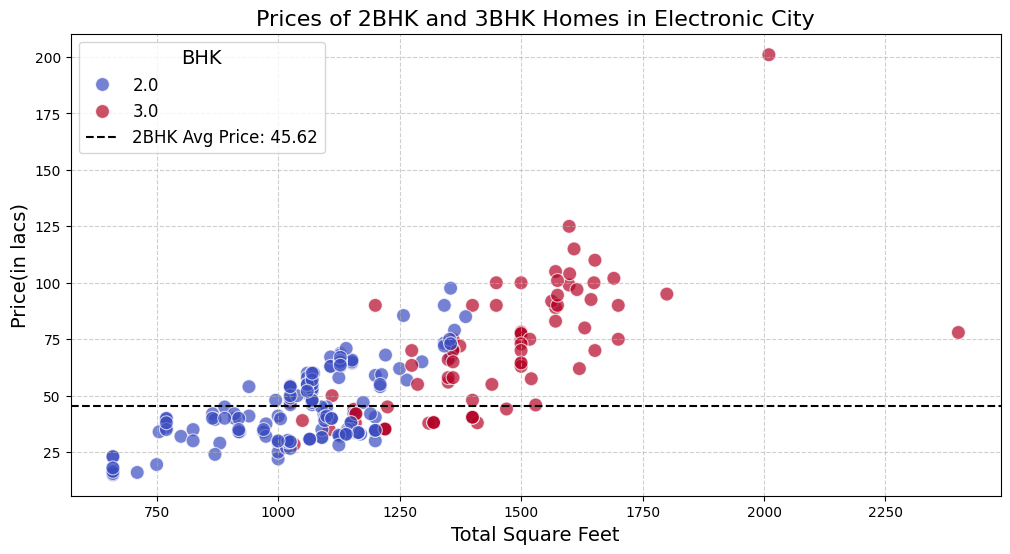

In [124]:
price_bhk_plot(df,'Electronic City')

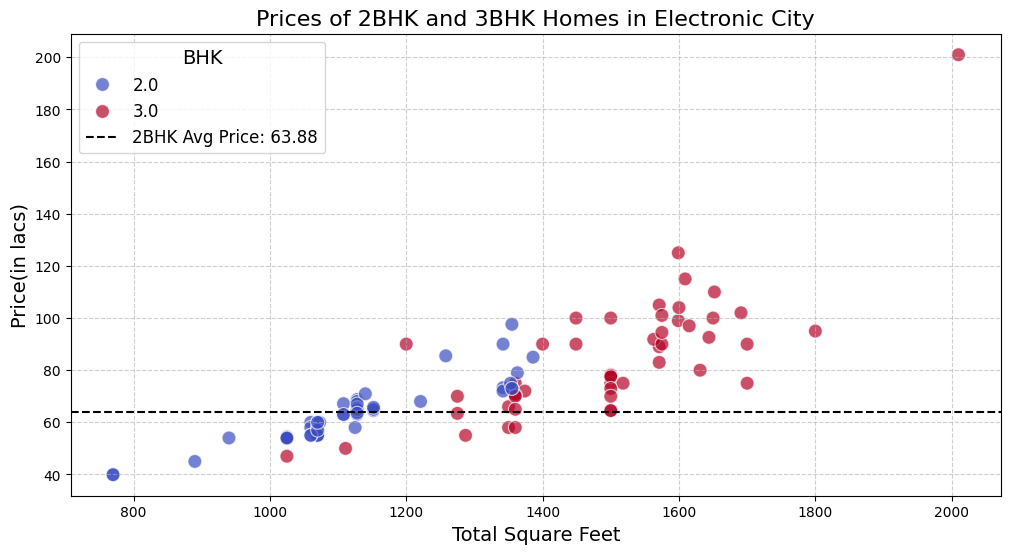

In [125]:
price_bhk_plot(df_outliers,'Electronic City')

In [126]:
df_ec = df[df['location'] == 'Electronic City']

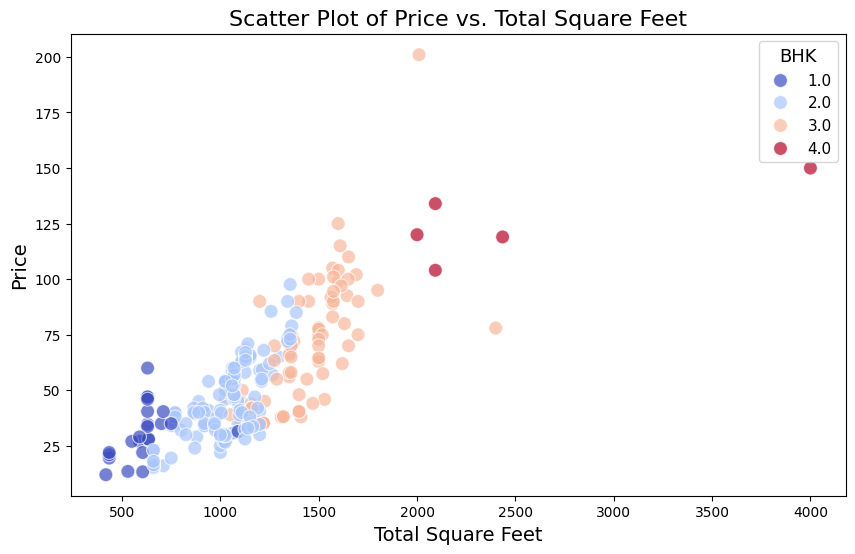

In [127]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ec,x = 'total_sqft',y = 'price',hue = 'BHK',palette='coolwarm', s=100, edgecolor='w', alpha=0.7)
plt.title('Scatter Plot of Price vs. Total Square Feet', fontsize=16)
plt.xlabel('Total Square Feet', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.legend(title='BHK', title_fontsize='13', fontsize='11', loc='best')
plt.show()

In [128]:
df_ec_ = df_outliers[df_outliers['location'] == 'Electronic City']

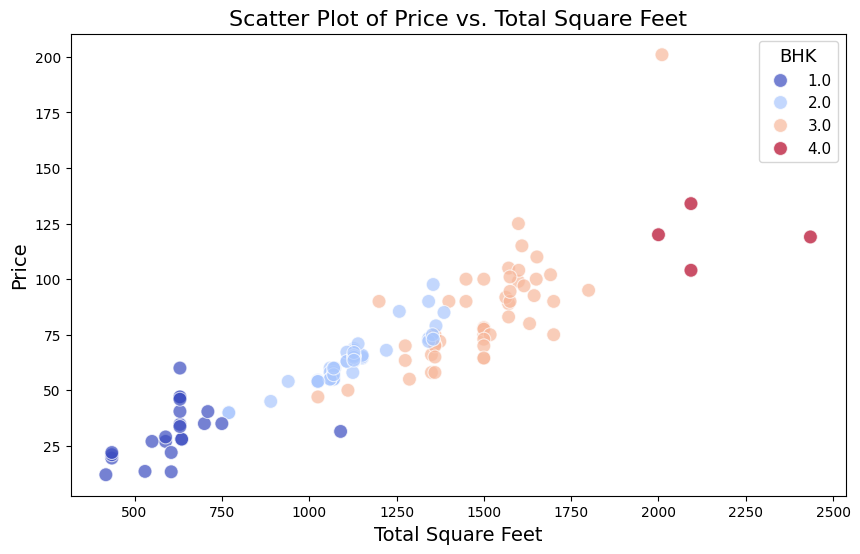

In [129]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ec_,x = 'total_sqft',y = 'price',hue = 'BHK',palette='coolwarm', s=100, edgecolor='w', alpha=0.7)
plt.title('Scatter Plot of Price vs. Total Square Feet', fontsize=16)
plt.xlabel('Total Square Feet', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.legend(title='BHK', title_fontsize='13', fontsize='11', loc='best')
plt.show()

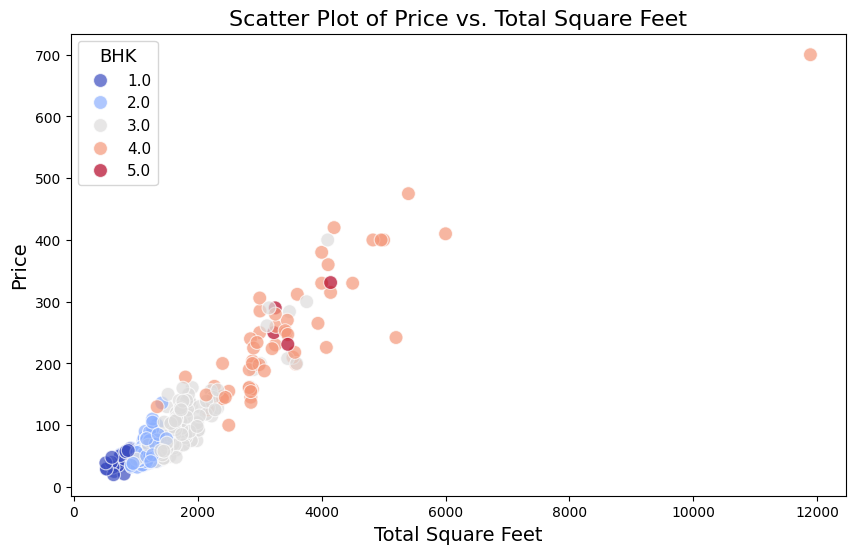

In [130]:
df_white_field = df[df['location'] == 'Whitefield']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_white_field,x = 'total_sqft',y = 'price',hue = 'BHK',palette='coolwarm', s=100, edgecolor='w', alpha=0.7)
plt.title('Scatter Plot of Price vs. Total Square Feet', fontsize=16)
plt.xlabel('Total Square Feet', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.legend(title='BHK', title_fontsize='13', fontsize='11', loc='best')
plt.show()

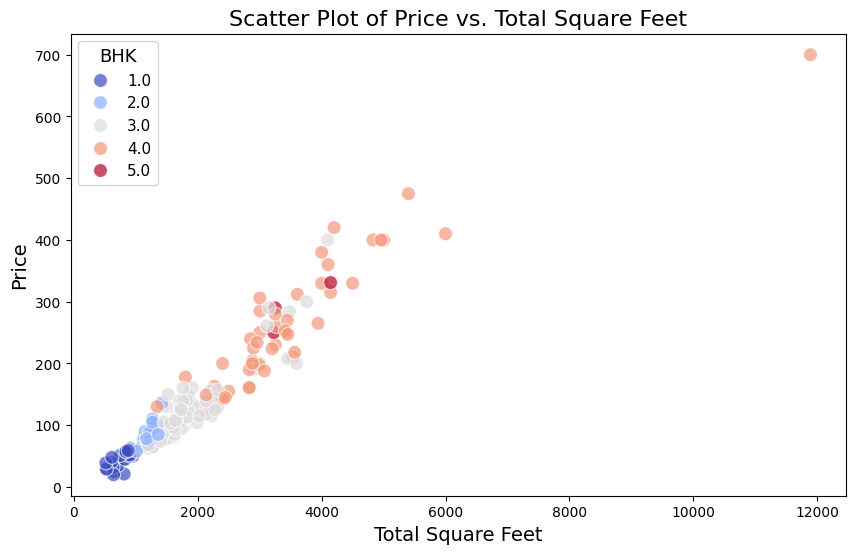

In [131]:
df_white_field_ = df_outliers[df_outliers['location'] == 'Whitefield']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_white_field_,x = 'total_sqft',y = 'price',hue = 'BHK',palette='coolwarm', s=100, edgecolor='w', alpha=0.7)
plt.title('Scatter Plot of Price vs. Total Square Feet', fontsize=16)
plt.xlabel('Total Square Feet', fontsize=14)
plt.ylabel('Price', fontsize=14)

plt.legend(title='BHK', title_fontsize='13', fontsize='11', loc='best')
plt.show()

In [132]:
df = df_outliers

In [133]:
df.shape

(7955, 7)

In [134]:
df.to_csv('../datasets/df_after_outliers.csv',index = False)